US Baby Names 1880-2010

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
tnames = ['name', 'sex', 'births']
names1880 = pd.read_csv('names/yob1880.txt', header=None, names=tnames)
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [12]:
names1880.groupby('sex')['births'].sum() # number of people born this year by gender

sex
F     90994
M    110490
Name: births, dtype: int64

In [25]:
years = range(1880, 2023)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame) # array containtn all info from txt
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) #ignore_index=True because we’re not interested in preserving the original row numbers
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [27]:
names.shape

(2085158, 4)

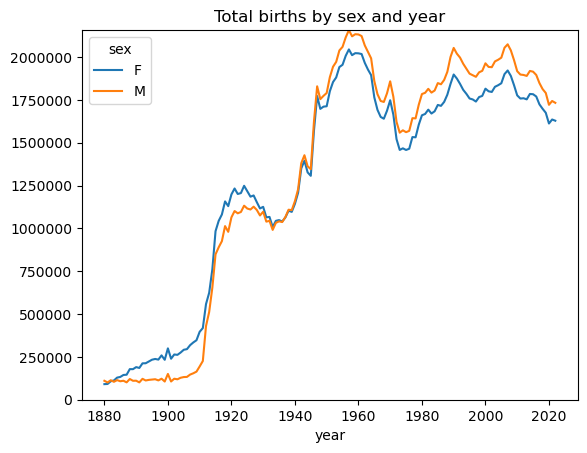

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442


In [41]:
total_births = names.pivot_table(index='year', columns='sex', values='births', aggfunc="sum")
ax = total_births.plot(title='Total births by sex and year')
ax.set_ylim(0, total_births.max().max()) 
ax.ticklabel_format(style='plain', axis='y')
plt.show()
total_births.head()